# Optimization for Grover's Algorithm

In [1]:
from qiskit import QuantumRegister, ClassicalRegister
import numpy as np
import matplotlib.pyplot as plt
import math
from qiskit.tools.visualization import circuit_drawer
from qiskit.providers.aer import noise
from qiskit import *
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

import pytket
from pytket.qiskit import qiskit_to_tk
from pytket.qiskit import tk_to_qiskit

## Target Alogithm is QHT (Quantum Hough Transform).

In [2]:
"""
#Import necessary libraries
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, IBMQ, transpile, execute
from qiskit.visualization import plot_state_hinton, plot_histogram, plot_bloch_vector, plot_state_qsphere
from qiskit.providers.ibmq import least_busy
import numpy as np

%config InlineBackend.figure_format = 'svg' # Makes the images look nice
%matplotlib inline
"""

#Configuration of Initial Parameters
n = 4         #number of qubits --- must be a power of 2.
N = 2**n
M = 2         #number of solutions to mark
solution_known = True
phi_estimated = 0.0     #enter the estimated value to start

#Calculate Phase-Shift angle and Number of Iterations
beta = np.arcsin(np.sqrt(M/N))
J = np.floor(((np.pi/2) - beta)/beta) + 1
phi_val = 2*np.arcsin(np.sin(np.pi/(4*J + 2))/np.sin(beta))
J = int(J)

print("Number of Qubits, n \t\t= ", n)
print("Number of Marked Solutions, M \t= ", M, "\n")
print("Phase-Shift Parameter, φ \t= ", phi_val)
print("Number of Iternations, J \t= ", J)
print("β value \t\t\t= ", beta)

if solution_known == False:
    phi_val = phi_estimated
else:
    pass

Number of Qubits, n 		=  4
Number of Marked Solutions, M 	=  2 

Phase-Shift Parameter, φ 	=  1.0268217318236212
Number of Iternations, J 	=  4
β value 			=  0.36136712390670783


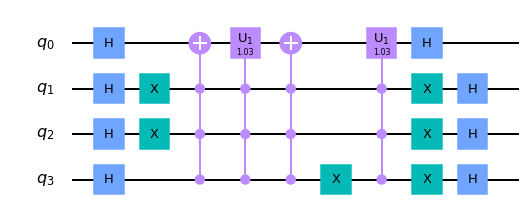

In [5]:
#Quantum Circuit Definition
qc = QuantumCircuit(n)

#Created equal superposition
for i in range(n):
    qc.h(i)
    
for k in range(1):

    #O_operator():
    #Even marked state = 254
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.mcx([1,2,3],0)
    #qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #-----
    #qc.x(1)
    #qc.x(2)
    #qc.x(3)
    qc.mcu1(phi_val, [1,2,3], 0) #multi-control phase
    #qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #-----
    #qc.x(1)
    #qc.x(2)
    #qc.x(3)
    qc.mcx([1,2,3],0)
    #qc.x(1)
    #qc.x(2)
    #qc.x(3)
    
    #Odd marked state = 1
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.mcu1(phi_val, [1,2,3], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    qc.x(3)
    
    
    #odd-values
    #qc.append()
    
    #even-values
    #qc.append()

    #W_inverse_operator   #just use the default inverse() function to make W^-1 operartor
    for i in range(n):
        qc.h(i)
    """
    qc.barrier()

    #def Io_operator():
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.mcx([1,2,3],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.mcu1(phi_val, [1,2,3], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.mcx([1,2,3],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    """

    #W_operator()
    #for i in range(n):
        #qc.h(i)
    #qc.barrier()

#qc.measure_all()

qc.draw(output='mpl')

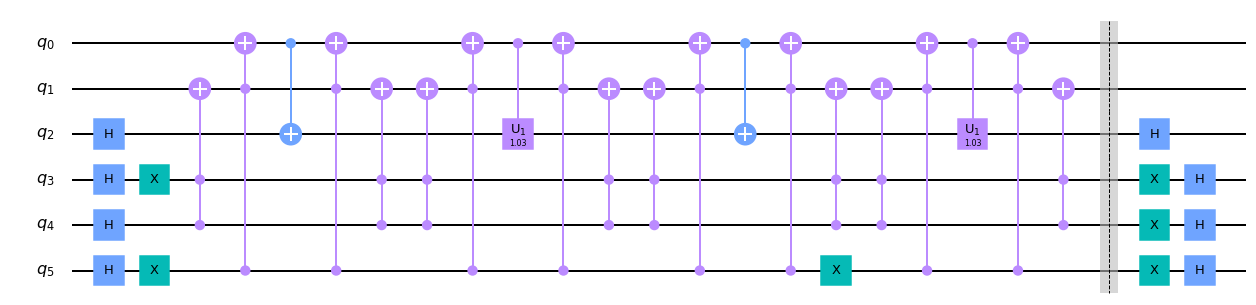

In [19]:
#Quantum Circuit Definition
n=6
qc = QuantumCircuit(n)

#Created equal superposition
for i in range(4):
    qc.h(i+2)
    
for k in range(1):


    qc.x(3)
    qc.x(5)

    qc.ccx(3,4,1)
    qc.ccx(5,1,0)
    qc.cx(0,2)
    qc.ccx(5,1,0)
    qc.ccx(3,4,1)
    
    
    qc.ccx(3,4,1)
    qc.ccx(5,1,0)
    qc.mcu1(phi_val,[0],2)
    qc.ccx(5,1,0)
    qc.ccx(3,4,1)
    
    

    qc.ccx(3,4,1)
    qc.ccx(5,1,0)
    qc.cx(0,2)
    qc.ccx(5,1,0)
    qc.ccx(3,4,1)

    qc.x(5)

    qc.ccx(3,4,1)
    qc.ccx(5,1,0)
    qc.mcu1(phi_val,[0],2)
    qc.ccx(5,1,0)
    qc.ccx(3,4,1)
    qc.barrier()
    qc.x(3)
    qc.x(4)
    qc.x(5)

    for i in range(4):
        qc.h(i+2)


qc.draw(output='mpl')

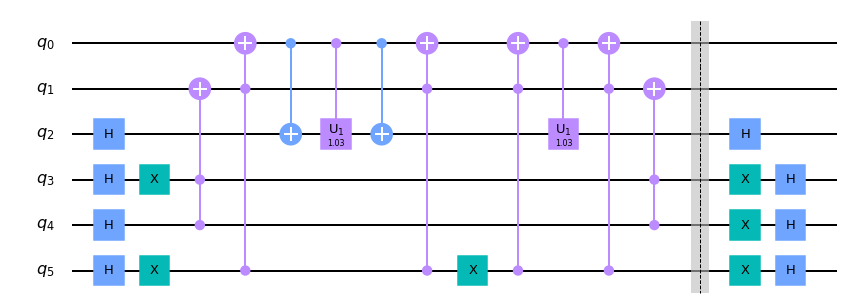

In [20]:
#Quantum Circuit Definition
n=6
qc = QuantumCircuit(n)

#Created equal superposition
for i in range(4):
    qc.h(i+2)
    
for k in range(1):


    qc.x(3)
    qc.x(5)

    qc.ccx(3,4,1)
    qc.ccx(5,1,0)
    qc.cx(0,2)

    qc.mcu1(phi_val,[0],2)

    qc.cx(0,2)
    qc.ccx(5,1,0)


    qc.x(5)


    qc.ccx(5,1,0)
    qc.mcu1(phi_val,[0],2)
    qc.ccx(5,1,0)
    qc.ccx(3,4,1)
    qc.barrier()
    qc.x(3)
    qc.x(4)
    qc.x(5)

    for i in range(4):
        qc.h(i+2)


qc.draw(output='mpl')

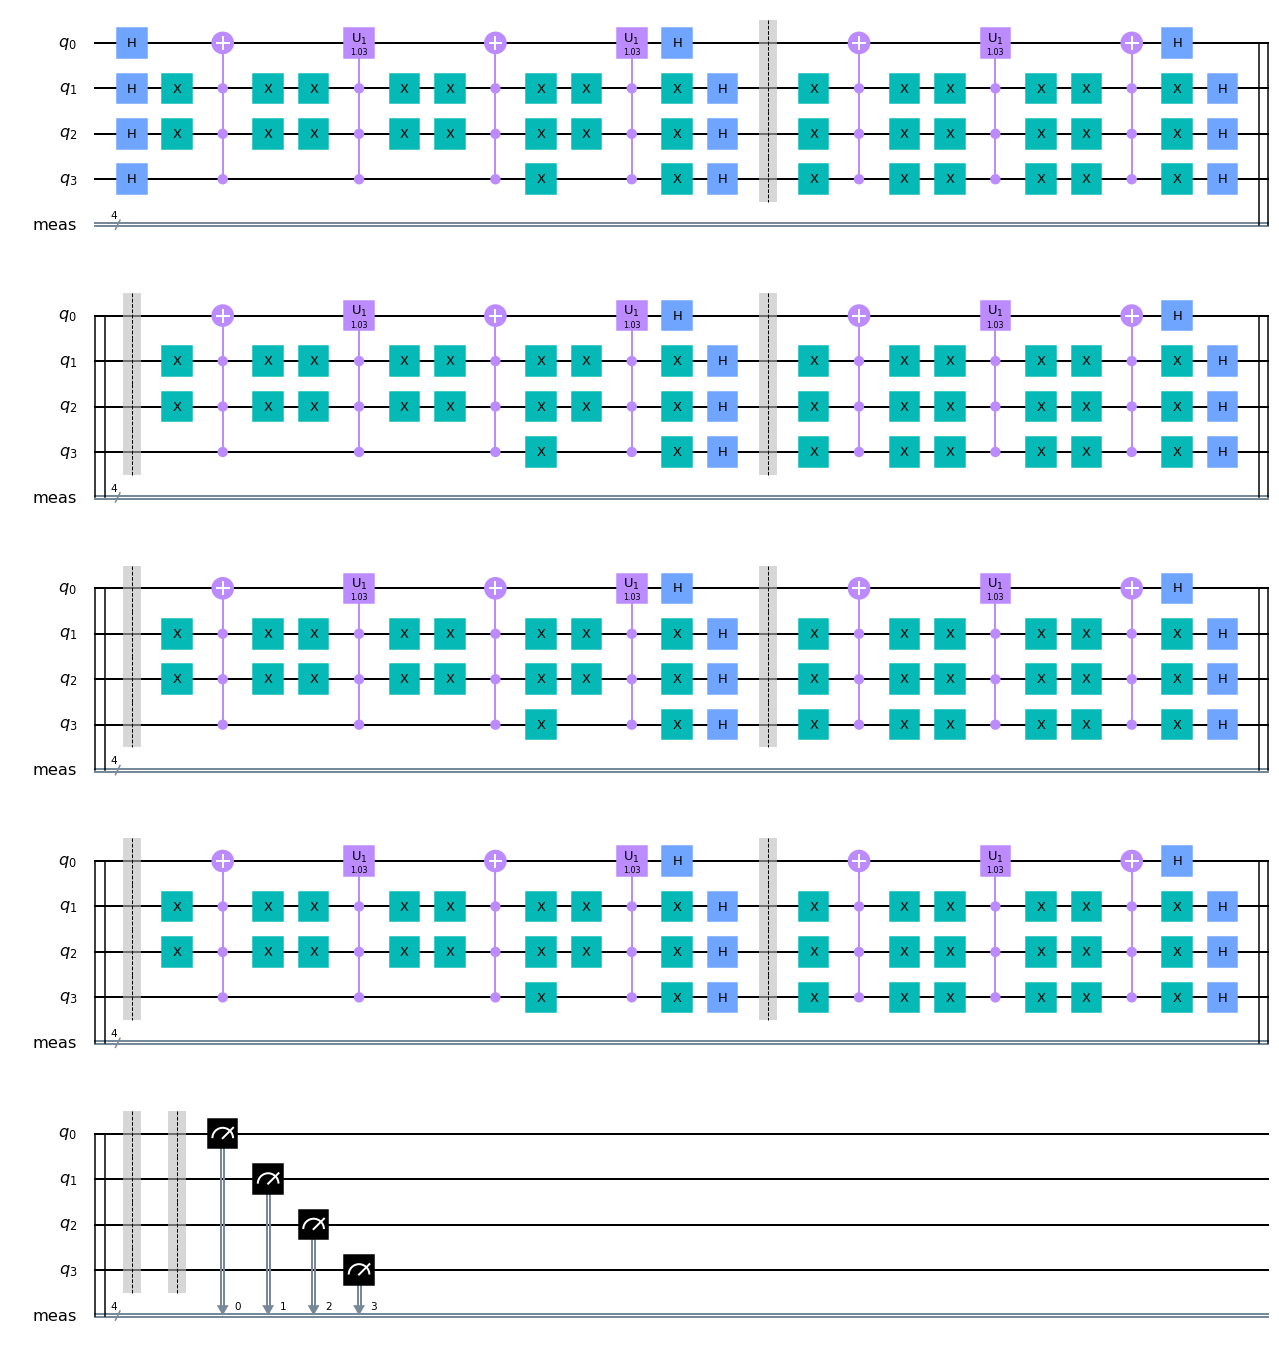

In [4]:
#Quantum Circuit Definition
qc = QuantumCircuit(n)

#Created equal superposition
for i in range(n):
    qc.h(i)
    
for k in range(J):

    #O_operator():
    #Even marked state = 254
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.mcx([1,2,3],0)
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    #-----
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.mcu1(phi_val, [1,2,3], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    #-----
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.mcx([1,2,3],0)
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    
    #Odd marked state = 1
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.mcu1(phi_val, [1,2,3], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    qc.x(3)
    
    #odd-values
    #qc.append()
    
    #even-values
    #qc.append()

    #W_inverse_operator   #just use the default inverse() function to make W^-1 operartor
    for i in range(n):
        qc.h(i)
    qc.barrier()

    #def Io_operator():
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.mcx([1,2,3],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.mcu1(phi_val, [1,2,3], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.mcx([1,2,3],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)

    #W_operator()
    for i in range(n):
        qc.h(i)
    qc.barrier()

qc.measure_all()
qc.draw(output='mpl')